＃＃　l1 l2正则化的区别：

In [15]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split
#from sklearn.mertics import accuracy_score


In [16]:
data = load_breast_cancer()
x = data.data
y =  data.target
data.data.shape


(569, 30)

In [19]:
Irl1 = LR(penalty="l1",solver = "liblinear",C=0.5,max_iter = 1000)
Irl2 = LR(penalty="l2",solver = "liblinear",C=0.5,max_iter = 1000)
Irl1 = Irl1.fit(x,y)
print(Irl1.coef_)


[[ 4.01116827  0.03204786 -0.13876329 -0.01621969  0.          0.
   0.          0.          0.          0.          0.          0.5056607
   0.         -0.07126106  0.          0.          0.          0.
   0.          0.          0.         -0.2460175  -0.1285869  -0.01440917
   0.          0.         -2.03042452  0.          0.          0.        ]]


In [20]:
(Irl1.coef_ !=0).sum(axis=1)

array([10])

In [22]:
Irl2 = Irl2.fit(x,y)
Irl2.coef_

array([[ 1.61541411e+00,  1.02300859e-01,  4.79634999e-02,
        -4.45030890e-03, -9.43136469e-02, -3.01439405e-01,
        -4.56192113e-01, -2.22484448e-01, -1.35800316e-01,
        -1.93953254e-02,  1.60057189e-02,  8.84862500e-01,
         1.19637597e-01, -9.46955296e-02, -9.82838672e-03,
        -2.36327058e-02, -5.71011111e-02, -2.70319142e-02,
        -2.77745541e-02,  2.15950986e-04,  1.26261246e+00,
        -3.01767368e-01, -1.72676431e-01, -2.21705021e-02,
        -1.73511093e-01, -8.79035647e-01, -1.16340871e+00,
        -4.27935079e-01, -4.21045045e-01, -8.69853368e-02]])

In [23]:
(Irl２.coef_ !=0).sum(axis=1)

array([30])

In [28]:
from sklearn.metrics import accuracy_score

In [ ]:
# 画出两种正则化 的学习曲线，对比一下

In [32]:
l1 = []
l2 = []
l1test = []
l2test = []
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size = 0.3,random_state=420)
for i in np.linspace(0.05,1,19):
    Irl1 = LR(penalty="l1",solver = "liblinear",C =  i ,max_iter = 1000)
    Irl2 = LR(penalty="l2",solver = "liblinear",C =  i ,max_iter = 1000)
    Irl1 = Irl1.fit(Xtrain,Ytrain)
    l1.append(accuracy_score(Irl1.predict(Xtrain),Ytrain))
    l1test.append(accuracy_score(Irl1.predict(Xtest),Ytest))
    
    Irl2 = Irl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(Irl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(Irl2.predict(Xtest),Ytest))


In [36]:
import matplotlib.pyplot as plt

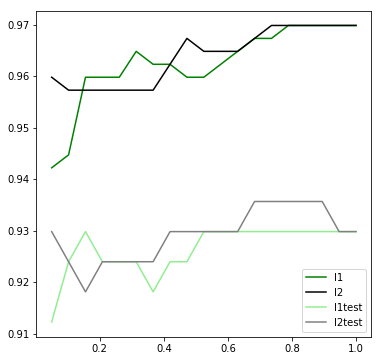

In [38]:
graph = [l1,l2,l1test,l2test]    
color = ["green","black","lightgreen","gray"]
label = ["l1","l2","l1test","l2test"]

plt.figure(figsize = (6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label=label[i])
    plt.legend(loc = 4 )
plt.show()

In [39]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

In [40]:
data = load_breast_cancer()
data.data.shape

(569, 30)

In [55]:
LR_ = LR(solver="liblinear",C = 0.9,random_state = 420)
cross_val_score(LR_,data.data,data.target,cv=10).mean()


0.9508998790078644

In [53]:
X_embedbed = SelectFromModel(LR_,norm_order = 1).fit_transform(data.data,data.target)
X_embedbed.shape
cross_val_score(LR_,X_embedbed,data.target,cv=10).mean()

0.9368323826808401